## EIA Monthly Electric Grid Data - Generation Capacity
## Exploratory Data Analysis

https://www.eia.gov/electricity/gridmonitor/about

In [65]:
import pandas as pd
import numpy as np

# genops.csv was retrieved from the U.S. Energy Information Administration API using code 
# in EIA_GetData3.ipynb
#csv_path = 'gencap.csv'
csv_path = 'joined_drop_dups.csv'
gencap = pd.read_csv(csv_path, low_memory=False)
gencap.shape

#eia_data['value'] = pd.to_numeric(eia_data['value'], errors='coerce')
#eia_data['period'] = pd.to_datetime(eia_data['period'], yearfirst=True, errors='coerce')
#eia_data = eia_data.rename(columns = {'value':'MWh'})
#eia_data = eia_data[['period','respondent','respondent_name', 'type', 'type_name', 'MWh']]

(3632532, 28)

In [66]:
gencap = gencap.drop_duplicates()
gencap.shape

(3632532, 28)

In [67]:
gencap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3632532 entries, 0 to 3632531
Data columns (total 28 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   period                        object 
 1   stateid                       object 
 2   stateName                     object 
 3   sector                        object 
 4   sectorName                    object 
 5   entityid                      object 
 6   entityName                    object 
 7   plantid                       object 
 8   plantName                     object 
 9   generatorid                   object 
 10  technology                    object 
 11  energy_source_code            object 
 12  energy-source-desc            object 
 13  prime_mover_code              object 
 14  balancing_authority_code      object 
 15  balancing-authority-name      object 
 16  status                        object 
 17  statusDescription             object 
 18  county                

In [68]:
gencap.head()

,period,stateid,stateName,sector,sectorName,entityid,entityName,plantid,plantName,generatorid,...,county,latitude,longitude,nameplate-capacity-mw,net-summer-capacity-mw,net-winter-capacity-mw,unit,nameplate-capacity-mw-units,net-summer-capacity-mw-units,net-winter-capacity-mw-units
0,2022-12,VA,Virginia,commercial-non-chp,Commercial Non-CHP,4496,Covanta Alexandria/Arlington,50663,Covanta Alexandria/Arlington Energy,GEN2,...,Alexandria City,38.8014,-77.1288,14.5,14.5,14.5,NaN,MW,MW,MW
1,2022-12,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",59157,Pecan PV1,PEC1,...,Richmond,34.909167,-79.829444,5.0,5.0,5.0,NaN,MW,MW,MW
2,2022-12,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",59518,Grandy PV 1,GRAND,...,Currituck,36.233611,-75.880833,20.0,20.0,20.0,NaN,MW,MW,MW
3,2022-12,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",59517,Baker PV 1,BAKE1,...,Hertford,36.270278,-77.060278,5.0,5.0,5.0,NaN,MW,MW,MW
4,2022-12,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",59516,American Legion PV 1,AMLEG,...,Halifax,36.418333,-77.655833,16.0,16.0,16.0,NaN,MW,MW,MW


In [69]:
gencap.columns = gencap.columns.str.replace('-', '_')
gencap['period'] = pd.to_datetime(gencap['period'], yearfirst=True, errors='coerce')
gencap['nameplate_capacity_mw'] = pd.to_numeric(gencap['nameplate_capacity_mw'], errors='coerce')
gencap['latitude'] = pd.to_numeric(gencap['latitude'], errors='coerce')
gencap['longitude'] = pd.to_numeric(gencap['longitude'], errors='coerce')
gencap['plantid'] = 'P' + gencap['plantid'].astype(str)


In [70]:
gencap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3632532 entries, 0 to 3632531
Data columns (total 28 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   period                        datetime64[ns]
 1   stateid                       object        
 2   stateName                     object        
 3   sector                        object        
 4   sectorName                    object        
 5   entityid                      object        
 6   entityName                    object        
 7   plantid                       object        
 8   plantName                     object        
 9   generatorid                   object        
 10  technology                    object        
 11  energy_source_code            object        
 12  energy_source_desc            object        
 13  prime_mover_code              object        
 14  balancing_authority_code      object        
 15  balancing_authority_name      ob

In [71]:
e_src = gencap[['energy_source_code', 'energy_source_desc']]
e_src.drop_duplicates()

,energy_source_code,energy_source_desc
0,MSW,Municipal Solid Waste (All)
1,SUN,Solar
24,DFO,Disillate Fuel Oil
33,WND,Wind
44,NG,Natural Gas
55,LFG,Landfill Gas
62,WH,Waste Heat
149,SUB,Subbituminous Coal
150,WAT,Water
192,MWH,Electricity used for energy storage


In [72]:
e_src.shape

(3632532, 2)

In [73]:
e_src = e_src.drop_duplicates().dropna().set_index('energy_source_code').transpose()
e_src

energy_source_code,MSW,SUN,DFO,WND,NG,LFG,WH,SUB,WAT,MWH,...,OBL,BFG,WDL,PG,Operating,SGC,SGP,OBS,TDF,SLW
energy_source_desc,Municipal Solid Waste (All),Solar,Disillate Fuel Oil,Wind,Natural Gas,Landfill Gas,Waste Heat,Subbituminous Coal,Water,Electricity used for energy storage,...,Other Biomass Liquids,Blast-Furnace Gas,Wood Waste Liquids,Gaseous Propane,Brevard,Coal-Derived Synthesis Gas,Synthesis Gas from Petroleum Coke,Other Biomass Solids,Tire-Derived Fuel,Sludge waste


In [74]:
print(e_src)

energy_source_code                          MSW    SUN                 DFO   
energy_source_desc  Municipal Solid Waste (All)  Solar  Disillate Fuel Oil  \

energy_source_code   WND           NG           LFG          WH   
energy_source_desc  Wind  Natural Gas  Landfill Gas  Waste Heat  \

energy_source_code                 SUB    WAT   
energy_source_desc  Subbituminous Coal  Water  \

energy_source_code                                  MWH  ...   
energy_source_desc  Electricity used for energy storage  ...  \

energy_source_code                     OBL                BFG   
energy_source_desc  Other Biomass Liquids   Blast-Furnace Gas  \

energy_source_code                 WDL               PG Operating   
energy_source_desc  Wood Waste Liquids  Gaseous Propane   Brevard  \

energy_source_code                         SGC   
energy_source_desc  Coal-Derived Synthesis Gas  \

energy_source_code                                SGP                   OBS   
energy_source_desc  Synthesis 

In [75]:
e_src_dict = e_src.to_dict()
print(e_src_dict)

{'MSW': {'energy_source_desc': 'Municipal Solid Waste (All)'}, 'SUN': {'energy_source_desc': 'Solar'}, 'DFO': {'energy_source_desc': 'Disillate Fuel Oil'}, 'WND': {'energy_source_desc': 'Wind'}, 'NG': {'energy_source_desc': 'Natural Gas'}, 'LFG': {'energy_source_desc': 'Landfill Gas'}, 'WH': {'energy_source_desc': 'Waste Heat'}, 'SUB': {'energy_source_desc': 'Subbituminous Coal'}, 'WAT': {'energy_source_desc': 'Water'}, 'MWH': {'energy_source_desc': 'Electricity used for energy storage'}, 'BIT': {'energy_source_desc': 'Bituminous Coal'}, 'RFO': {'energy_source_desc': 'Residual Fuel Oil'}, 'RC': {'energy_source_desc': 'Refined Coal'}, 'OG': {'energy_source_desc': 'Other Gas'}, 'OBG': {'energy_source_desc': 'Other Biomass Gases '}, 'WDS': {'energy_source_desc': 'Wood Waste Solids'}, 'GEO': {'energy_source_desc': 'Geothermal'}, 'BLQ': {'energy_source_desc': 'Black Liquor'}, 'JF': {'energy_source_desc': 'Jet Fuel'}, 'PC': {'energy_source_desc': 'Petroleum Coke'}, 'OTH': {'energy_source_des

In [76]:
import json
e_src_dict_fname = 'e_src_dict.json'
with open(e_src_dict_fname, "w") as outfile:
    json.dump(e_src_dict, outfile, indent=4)

In [77]:
gencap.head()

,period,stateid,stateName,sector,sectorName,entityid,entityName,plantid,plantName,generatorid,...,county,latitude,longitude,nameplate_capacity_mw,net_summer_capacity_mw,net_winter_capacity_mw,unit,nameplate_capacity_mw_units,net_summer_capacity_mw_units,net_winter_capacity_mw_units
0,2022-12-01,VA,Virginia,commercial-non-chp,Commercial Non-CHP,4496,Covanta Alexandria/Arlington,P50663,Covanta Alexandria/Arlington Energy,GEN2,...,Alexandria City,38.801400,-77.128800,14.5,14.5,14.5,NaN,MW,MW,MW
1,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59157,Pecan PV1,PEC1,...,Richmond,34.909167,-79.829444,5.0,5.0,5.0,NaN,MW,MW,MW
2,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59518,Grandy PV 1,GRAND,...,Currituck,36.233611,-75.880833,20.0,20.0,20.0,NaN,MW,MW,MW
3,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59517,Baker PV 1,BAKE1,...,Hertford,36.270278,-77.060278,5.0,5.0,5.0,NaN,MW,MW,MW
4,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59516,American Legion PV 1,AMLEG,...,Halifax,36.418333,-77.655833,16.0,16.0,16.0,NaN,MW,MW,MW


<Axes: xlabel='period'>

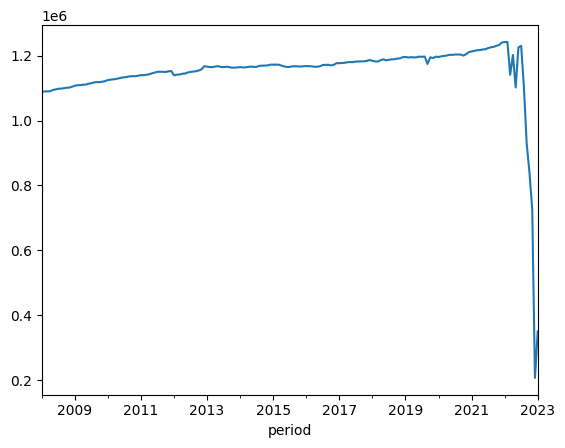

In [78]:
gencap.groupby('period')['nameplate_capacity_mw'].sum().plot(x='period',y='nameplate_capacity_mw')

<Axes: xlabel='period'>

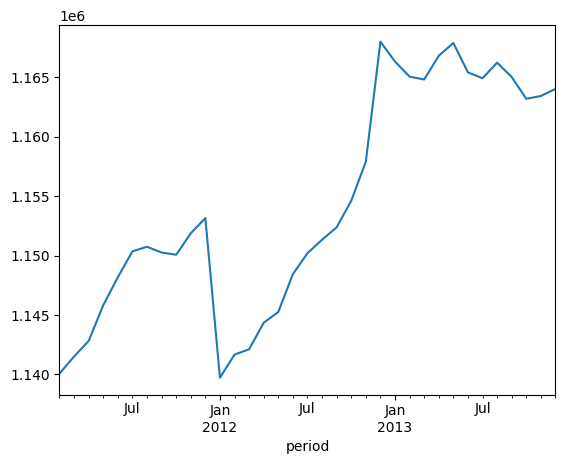

In [79]:
gencap[(gencap.period > '2011-01-01') & (gencap.period < '2014-01-01')].groupby('period')['nameplate_capacity_mw'].sum() \
    .plot(x='period',y='nameplate_capacity_mw')

<Axes: >

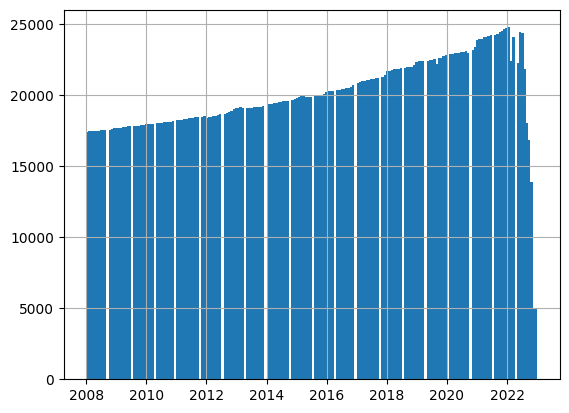

In [16]:
gencap['period'].hist(bins=200)

In [17]:
gencap.describe(include=['O']).T

,count,unique,top,freq
stateid,3632532,52,CA,394265
stateName,3632532,52,California,394265
sector,3632532,12,electric-utility,1697685
sectorName,3632532,8,Electric Utility,1697685
entityid,3632532,6942,55938,71709
entityName,3632356,8066,Industrial Power Generating Company LLC,71709
plantid,3632532,12923,P1751,13167
plantName,3632473,13713,Edison Sault,13167
generatorid,3632473,8947,1,503577
technology,3632473,28,Conventional Hydroelectric,716979


In [18]:
gencap.describe().T

,count,mean,min,25%,50%,75%,max,std
period,3632522,2015-11-03 01:27:22.908151040,2008-01-01 00:00:00,2012-03-01 00:00:00,2016-02-01 00:00:00,2019-08-01 00:00:00,2023-01-01 00:00:00,NaN
latitude,3623044.0,39.260154,0.675,35.197044,39.743611,42.696944,71.2925,6.263118
longitude,3622272.0,-72.818553,-291.131944,-100.9156,-87.62537,-76.0769,171.7375,62.962378
nameplate_capacity_mw,3632424.0,57.299352,0.1,1.5,5.3,53.1,1499.4,134.411283
net_summer_capacity_mw,3611053.0,52.684475,-6.0,1.4,5.0,47.0,2353.2,127.644187
net_winter_capacity_mw,3609990.0,54.669941,-6.0,1.4,5.0,49.0,2353.2,130.193531


<Axes: xlabel='period'>

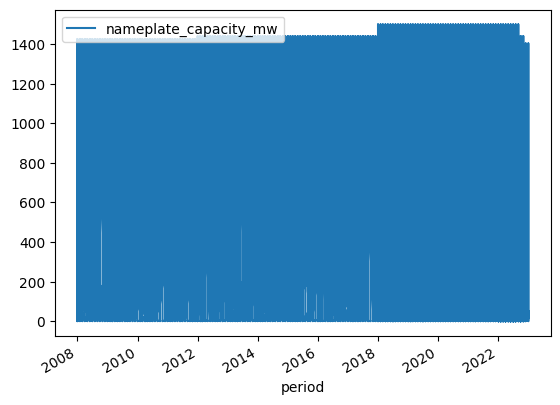

In [19]:
gencap.plot(x='period', y='nameplate_capacity_mw')

<Axes: >

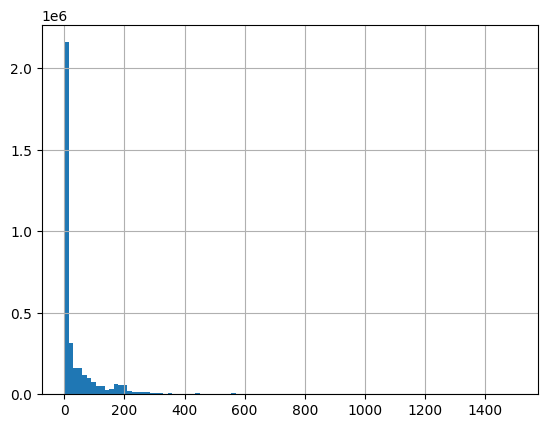

In [20]:
gencap.nameplate_capacity_mw.hist(bins=100)

In [21]:
#retain full gencap
gencap_full = gencap.copy()

In [22]:
#group by BA using gencap data
gencap['statusDescription'].unique()


array(['Operating',
       'Standby/Backup: available for service but not normally used',
       'Out of service but expected to return to service in next calendar year',
       'Out of service and NOT expected to return to service in next calendar year',
       nan, '180.0', '157.0', '156.0', '155.0'], dtype=object)

In [23]:
gencap['status'].unique()

array(['OP', 'SB', 'OA', 'OS', nan, '163.0', '163.8', '157.0', '156.0',
       '155.0'], dtype=object)

In [24]:
gencap.shape

(3632532, 28)

In [25]:
gencap = gencap[gencap.status.isin(['OP','SB'])]
gencap.shape

(3532049, 28)

In [26]:
ba_av_loc= pd.DataFrame(gencap.groupby('balancing_authority_code')['latitude'].mean())
ba_av_loc['av_lon'] = gencap.groupby('balancing_authority_code')['longitude'].mean()
ba_av_loc = ba_av_loc.rename(columns = {'latitude':'av_lat'})
ba_av_loc.head()

,av_lat,av_lon
balancing_authority_code,,
AEC,31.264018,-86.673644
AECI,39.513189,-92.651078
AVA,47.733859,-117.229689
AVRN,44.536798,-120.856846
AZPS,33.445402,-112.515959


In [27]:
gencap = gencap[['period','balancing_authority_code','energy_source_code','nameplate_capacity_mw']]
gencap.head()

,period,balancing_authority_code,energy_source_code,nameplate_capacity_mw
0,2022-12-01,PJM,MSW,14.5
1,2022-12-01,CPLE,SUN,5.0
2,2022-12-01,PJM,SUN,20.0
3,2022-12-01,PJM,SUN,5.0
4,2022-12-01,PJM,SUN,16.0


In [28]:
gencap = gencap.rename(columns={'balancing_authority_code':'balancing_auth', 'energy_source_code':'energy_source', \
                       'nameplate_capacity_mw':'np_cap_mw'})
gencap.head()

,period,balancing_auth,energy_source,np_cap_mw
0,2022-12-01,PJM,MSW,14.5
1,2022-12-01,CPLE,SUN,5.0
2,2022-12-01,PJM,SUN,20.0
3,2022-12-01,PJM,SUN,5.0
4,2022-12-01,PJM,SUN,16.0


In [29]:
import json

BA_dict_fname = 'BA_dict.json'
with open(BA_dict_fname, "r") as infile:
    BA_dict = json.load(infile)
print(BA_dict)

{'YAD': {'BA_Name': 'Alcoa Power Generating, Inc. - Yadkin Division', 'Time_Zone': 'Eastern', 'Region_Country_Code': 'CAR', 'Region_Country_Name': 'Carolinas', 'Generation_Only_BA': 'Yes', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'AZPS': {'BA_Name': 'Arizona Public Service Company', 'Time_Zone': 'Arizona', 'Region_Country_Code': 'SW', 'Region_Country_Name': 'Southwest', 'Generation_Only_BA': 'No', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'DEAA': {'BA_Name': 'Arlington Valley, LLC', 'Time_Zone': 'Arizona', 'Region_Country_Code': 'SW', 'Region_Country_Name': 'Southwest', 'Generation_Only_BA': 'Yes', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'AECI': {'BA_Name': 'Associated Electric Cooperative, Inc.', 'Time_Zone': 'Central', 'Region_Country_Code': 'MIDW', 'Region_Country_

In [30]:
#remove non-US BAs, and larger regions
gencap = gencap[gencap.balancing_auth.isin(BA_dict.keys())]
gencap.shape

(2370847, 4)

In [31]:
merge_other = ['BLQ','WDL','BFG','OBL','PUR','AB','WDS','OBG','OG','MWH','WH','LFG','OBS']
gencap['energy_source'] = gencap['energy_source'].apply(lambda f: 'OTH' if f in merge_other else f)
gencap.head()

,period,balancing_auth,energy_source,np_cap_mw
0,2022-12-01,PJM,MSW,14.5
1,2022-12-01,CPLE,SUN,5.0
2,2022-12-01,PJM,SUN,20.0
3,2022-12-01,PJM,SUN,5.0
4,2022-12-01,PJM,SUN,16.0


In [32]:
gencap = gencap.groupby(['period', 'balancing_auth', 'energy_source'], as_index = False) \
    ['np_cap_mw'].aggregate('sum')
gencap.shape
gencap.head()

,period,balancing_auth,energy_source,np_cap_mw
0,2013-01-01,AEC,BIT,538.0
1,2013-01-01,AEC,NG,1330.0
2,2013-01-01,AEC,OTH,4.8
3,2013-01-01,AEC,WAT,8.2
4,2013-01-01,AECI,DFO,143.5


In [33]:
gencap.head(20)

,period,balancing_auth,energy_source,np_cap_mw
0,2013-01-01,AEC,BIT,538.0
1,2013-01-01,AEC,NG,1330.0
2,2013-01-01,AEC,OTH,4.8
3,2013-01-01,AEC,WAT,8.2
4,2013-01-01,AECI,DFO,143.5
5,2013-01-01,AECI,NG,3063.5
6,2013-01-01,AECI,SUB,2481.7
7,2013-01-01,AECI,WAT,106.2
8,2013-01-01,AECI,WND,312.5
9,2013-01-01,AVA,DFO,2.8


In [34]:
gencap.energy_source.unique()

array(['BIT', 'NG', 'OTH', 'WAT', 'DFO', 'SUB', 'WND', 'MSW', 'SUN',
       'GEO', 'NUC', 'JF', 'PC', 'PG', 'RC', 'LIG', 'RFO', 'KER', 'SGP',
       'WC', 'WO', 'SGC', 'TDF', 'SLW'], dtype=object)

In [35]:
gencap_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3632532 entries, 0 to 3632531
Data columns (total 28 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   period                        datetime64[ns]
 1   stateid                       object        
 2   stateName                     object        
 3   sector                        object        
 4   sectorName                    object        
 5   entityid                      object        
 6   entityName                    object        
 7   plantid                       object        
 8   plantName                     object        
 9   generatorid                   object        
 10  technology                    object        
 11  energy_source_code            object        
 12  energy_source_desc            object        
 13  prime_mover_code              object        
 14  balancing_authority_code      object        
 15  balancing_authority_name      ob

In [36]:
gencap_full.head()

,period,stateid,stateName,sector,sectorName,entityid,entityName,plantid,plantName,generatorid,...,county,latitude,longitude,nameplate_capacity_mw,net_summer_capacity_mw,net_winter_capacity_mw,unit,nameplate_capacity_mw_units,net_summer_capacity_mw_units,net_winter_capacity_mw_units
0,2022-12-01,VA,Virginia,commercial-non-chp,Commercial Non-CHP,4496,Covanta Alexandria/Arlington,P50663,Covanta Alexandria/Arlington Energy,GEN2,...,Alexandria City,38.801400,-77.128800,14.5,14.5,14.5,NaN,MW,MW,MW
1,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59157,Pecan PV1,PEC1,...,Richmond,34.909167,-79.829444,5.0,5.0,5.0,NaN,MW,MW,MW
2,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59518,Grandy PV 1,GRAND,...,Currituck,36.233611,-75.880833,20.0,20.0,20.0,NaN,MW,MW,MW
3,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59517,Baker PV 1,BAKE1,...,Hertford,36.270278,-77.060278,5.0,5.0,5.0,NaN,MW,MW,MW
4,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59516,American Legion PV 1,AMLEG,...,Halifax,36.418333,-77.655833,16.0,16.0,16.0,NaN,MW,MW,MW


In [37]:
ba_plants = gencap_full[['plantid', 'balancing_authority_code']].rename(columns={ \
    'plantid':'plant_id', 'balancing_authority_code':'ba_code'}).drop_duplicates() \
    .set_index('plant_id').dropna()

ba_plants.head()


,ba_code
plant_id,
P50663,PJM
P59157,CPLE
P59518,PJM
P59517,PJM
P59516,PJM


In [38]:
plant_ba_dict = ba_plants.transpose().to_dict(orient='index')['ba_code']
plant_ba_dict

C:\Users\lilye\AppData\Local\Temp\ipykernel_29572\3242105545.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  plant_ba_dict = ba_plants.transpose().to_dict(orient='index')['ba_code']


{'P50663': 'PJM',
 'P59157': 'CPLE',
 'P59518': 'PJM',
 'P59517': 'PJM',
 'P59516': 'PJM',
 'P59515': 'PJM',
 'P59156': 'CPLE',
 'P64655': 'WACM',
 'P64654': 'WACM',
 'P64653': 'WACM',
 'P64652': 'WACM',
 'P64651': 'WACM',
 'P64650': 'WACM',
 'P64649': 'WACM',
 'P64648': 'WACM',
 'P64647': 'PJM',
 'P64646': 'PJM',
 'P64645': 'PJM',
 'P64644': 'PJM',
 'P64643': 'PJM',
 'P64642': 'PJM',
 'P64608': 'PJM',
 'P64606': 'PJM',
 'P64605': 'ISNE',
 'P63646': 'NYIS',
 'P63645': 'PJM',
 'P58102': 'CISO',
 'P58101': 'CISO',
 'P58096': 'PJM',
 'P58095': 'PJM',
 'P58094': 'PJM',
 'P58093': 'PJM',
 'P58085': 'CISO',
 'P58091': 'PJM',
 'P58084': 'ISNE',
 'P58080': 'ERCO',
 'P58079': 'PJM',
 'P65580': 'ERCO',
 'P61652': 'MISO',
 'P56544': 'MISO',
 'P61028': 'PJM',
 'P50624': 'CISO',
 'P59312': 'SWPP',
 'P59311': 'SWPP',
 'P64483': 'MISO',
 'P64482': 'MISO',
 'P64479': 'MISO',
 'P64154': 'MISO',
 'P64153': 'MISO',
 'P63987': 'MISO',
 'P63726': 'MISO',
 'P63725': 'MISO',
 'P63724': 'MISO',
 'P63249': 'MI

In [39]:
plant_ba_dict_fname = 'plant_ba_dict.json'
with open(plant_ba_dict_fname, "w") as outfile:
    json.dump(plant_ba_dict, outfile, indent=4)

In [40]:
# NaN balancing authorities were dropped from plant:ba dict
# example NaN BA in Alaska:
gencap_full[gencap_full.plantid == 'P55966'].iloc[0]

period                                       2022-12-01 00:00:00
stateid                                                       AK
stateName                                                 Alaska
sector                                          electric-utility
sectorName                                      Electric Utility
entityid                                                   19558
entityName                               Homer Electric Assn Inc
plantid                                                   P55966
plantName                                 Nikiski Combined Cycle
generatorid                                                  ST1
technology                      Natural Gas Fired Combined Cycle
energy_source_code                                            NG
energy_source_desc                                   Natural Gas
prime_mover_code                                              CA
balancing_authority_code                                     NaN
balancing_authority_name 

In [41]:
gencap.head()

,period,balancing_auth,energy_source,np_cap_mw
0,2013-01-01,AEC,BIT,538.0
1,2013-01-01,AEC,NG,1330.0
2,2013-01-01,AEC,OTH,4.8
3,2013-01-01,AEC,WAT,8.2
4,2013-01-01,AECI,DFO,143.5


In [42]:
gencap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43337 entries, 0 to 43336
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   period          43337 non-null  datetime64[ns]
 1   balancing_auth  43337 non-null  object        
 2   energy_source   43337 non-null  object        
 3   np_cap_mw       43337 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.3+ MB


In [43]:
gencap = gencap.rename(columns={'balancing_auth':'ba_code', 'energy_source':'energy_src', \
                       'np_cap_mw':'capacity_mw'})

In [44]:
merge_other = ['BLQ','WDL','BFG','OBL','PUR','AB','WDS','OBG','OG','MWH','WH','LFG','OBS']
gencap['energy_src'] = gencap['energy_src'].apply(lambda f: 'OTH' if f in merge_other else f)
gencap.head()

,period,ba_code,energy_src,capacity_mw
0,2013-01-01,AEC,BIT,538.0
1,2013-01-01,AEC,NG,1330.0
2,2013-01-01,AEC,OTH,4.8
3,2013-01-01,AEC,WAT,8.2
4,2013-01-01,AECI,DFO,143.5


In [45]:
gencap.energy_src.unique()

array(['BIT', 'NG', 'OTH', 'WAT', 'DFO', 'SUB', 'WND', 'MSW', 'SUN',
       'GEO', 'NUC', 'JF', 'PC', 'PG', 'RC', 'LIG', 'RFO', 'KER', 'SGP',
       'WC', 'WO', 'SGC', 'TDF', 'SLW'], dtype=object)

In [46]:
gencap.head()

,period,ba_code,energy_src,capacity_mw
0,2013-01-01,AEC,BIT,538.0
1,2013-01-01,AEC,NG,1330.0
2,2013-01-01,AEC,OTH,4.8
3,2013-01-01,AEC,WAT,8.2
4,2013-01-01,AECI,DFO,143.5


<Axes: ylabel='energy_src'>

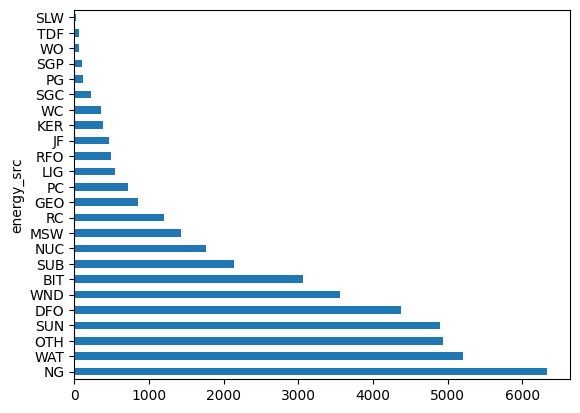

In [47]:
gencap['energy_src'].value_counts().plot(kind='barh')

<Axes: ylabel='energy_src'>

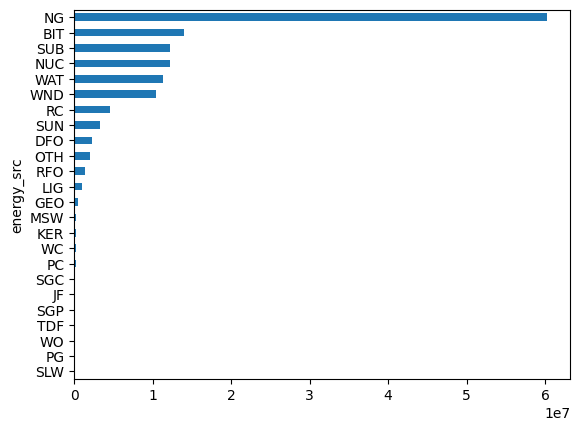

In [48]:
gencap.groupby(by='energy_src')['capacity_mw'].sum().sort_values().plot(kind='barh')

In [49]:
# should be more accurate because it's limited to one month
#gencap[gencap.period == '2021-12-01'].groupby(by='energy_src')['capacity_mw'].sum().sort_values().plot(kind='barh')

<Axes: ylabel='energy_src'>

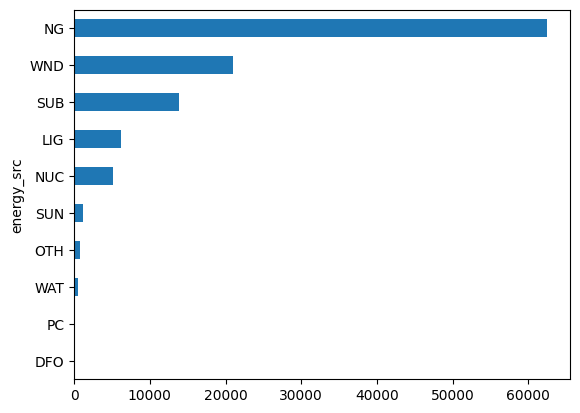

In [50]:
gencap[(gencap.period == '2017-12-01') & (gencap.ba_code == 'ERCO')].groupby(by='energy_src')['capacity_mw'].sum().sort_values().plot(kind='barh')

In [51]:
#consider removing features - everything with less installed capacity than GEO? Or WC?

In [52]:
gencap[gencap.ba_code == 'WWA']

,period,ba_code,energy_src,capacity_mw
349,2013-01-01,WWA,WND,189.0
699,2013-02-01,WWA,WND,189.0
1049,2013-03-01,WWA,WND,189.0
1399,2013-04-01,WWA,WND,189.0
1749,2013-05-01,WWA,WND,189.0
...,...,...,...,...
41475,2022-06-01,WWA,WND,189.0
41838,2022-07-01,WWA,WND,189.0
42187,2022-08-01,WWA,WND,189.0
42513,2022-09-01,WWA,WND,189.0


In [53]:
genconf = gencap.pivot(index=['ba_code','period'], columns='energy_src', values='capacity_mw')
genconf.head()

energy_src            BIT  DFO  GEO  JF  KER  LIG  MSW      NG  NUC  OTH  ...   
ba_code period                                                            ...   
AEC     2013-01-01  538.0  NaN  NaN NaN  NaN  NaN  NaN  1330.0  NaN  4.8  ...  \
        2013-02-01  538.0  NaN  NaN NaN  NaN  NaN  NaN  1330.0  NaN  4.8  ...   
        2013-03-01  538.0  NaN  NaN NaN  NaN  NaN  NaN  1330.0  NaN  4.8  ...   
        2013-04-01  538.0  NaN  NaN NaN  NaN  NaN  NaN  1330.0  NaN  4.8  ...   
        2013-05-01  538.0  NaN  NaN NaN  NaN  NaN  NaN  1330.0  NaN  4.8  ...   

energy_src          SGC  SGP  SLW  SUB  SUN  TDF  WAT  WC  WND  WO  
ba_code period                                                      
AEC     2013-01-01  NaN  NaN  NaN  NaN  NaN  NaN  8.2 NaN  NaN NaN  
        2013-02-01  NaN  NaN  NaN  NaN  NaN  NaN  8.2 NaN  NaN NaN  
        2013-03-01  NaN  NaN  NaN  NaN  NaN  NaN  8.2 NaN  NaN NaN  
        2013-04-01  NaN  NaN  NaN  NaN  NaN  NaN  8.2 NaN  NaN NaN  
        2013-05-01  NaN  NaN  NaN  NaN  NaN  NaN  8.2 NaN  NaN NaN  

[5 rows x 24 columns]

In [54]:
genconf = genconf.fillna(0)

In [55]:
genconf.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7730 entries, ('AEC', Timestamp('2013-01-01 00:00:00')) to ('YAD', Timestamp('2022-11-01 00:00:00'))
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BIT     7730 non-null   float64
 1   DFO     7730 non-null   float64
 2   GEO     7730 non-null   float64
 3   JF      7730 non-null   float64
 4   KER     7730 non-null   float64
 5   LIG     7730 non-null   float64
 6   MSW     7730 non-null   float64
 7   NG      7730 non-null   float64
 8   NUC     7730 non-null   float64
 9   OTH     7730 non-null   float64
 10  PC      7730 non-null   float64
 11  PG      7730 non-null   float64
 12  RC      7730 non-null   float64
 13  RFO     7730 non-null   float64
 14  SGC     7730 non-null   float64
 15  SGP     7730 non-null   float64
 16  SLW     7730 non-null   float64
 17  SUB     7730 non-null   float64
 18  SUN     7730 non-null   float64
 19  TDF     7730 non-null   float64
 2

In [56]:
genconf.describe()

energy_src,BIT,DFO,GEO,JF,KER,LIG,MSW,NG,NUC,OTH,...,SGC,SGP,SLW,SUB,SUN,TDF,WAT,WC,WND,WO
count,7730.000000,7730.000000,7730.000000,7730.000000,7730.000000,7730.000000,7730.000000,7730.000000,7730.000000,7730.000000,...,7730.000000,7730.000000,7730.000000,7730.000000,7730.000000,7730.000000,7730.000000,7730.000000,7730.000000,7730.000000
mean,1812.162950,302.196274,55.273234,5.084088,36.916352,123.002885,38.587853,7784.115563,1572.024683,261.266960,...,14.447076,2.649832,0.004670,1581.058693,430.271423,0.489004,1465.939457,26.755123,1352.811527,0.477128
std,6394.701167,913.133316,279.353166,28.281642,204.447881,715.410368,130.672359,16813.017883,4856.714476,675.423891,...,98.207815,24.247972,0.094088,5296.768209,1472.769794,6.374393,2996.081329,202.092210,4239.093137,6.558722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,301.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1450.200000,0.000000,17.500000,...,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,243.400000,0.000000,0.000000,0.000000
75%,1284.675000,100.600000,0.000000,0.000000,0.000000,0.000000,0.000000,4916.100000,0.000000,206.550000,...,0.000000,0.000000,0.000000,261.000000,258.400000,0.000000,1324.900000,0.000000,440.500000,0.000000
max,69847.000000,6576.400000,2170.500000,223.500000,1442.100000,7686.900000,795.500000,98687.100000,35975.700000,4614.100000,...,804.500000,304.500000,1.900000,53206.700000,16208.500000,135.000000,20422.600000,1790.900000,33559.000000,100.000000


In [57]:
genconf = genconf.reset_index()

In [58]:
genconf.head()

energy_src,ba_code,period,BIT,DFO,GEO,JF,KER,LIG,MSW,NG,...,SGC,SGP,SLW,SUB,SUN,TDF,WAT,WC,WND,WO
0,AEC,2013-01-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0
1,AEC,2013-02-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0
2,AEC,2013-03-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0
3,AEC,2013-04-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0
4,AEC,2013-05-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0


In [59]:
genconf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7730 entries, 0 to 7729
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ba_code  7730 non-null   object        
 1   period   7730 non-null   datetime64[ns]
 2   BIT      7730 non-null   float64       
 3   DFO      7730 non-null   float64       
 4   GEO      7730 non-null   float64       
 5   JF       7730 non-null   float64       
 6   KER      7730 non-null   float64       
 7   LIG      7730 non-null   float64       
 8   MSW      7730 non-null   float64       
 9   NG       7730 non-null   float64       
 10  NUC      7730 non-null   float64       
 11  OTH      7730 non-null   float64       
 12  PC       7730 non-null   float64       
 13  PG       7730 non-null   float64       
 14  RC       7730 non-null   float64       
 15  RFO      7730 non-null   float64       
 16  SGC      7730 non-null   float64       
 17  SGP      7730 non-null   float64 

In [60]:
genconf = genconf.set_index('ba_code').join(ba_av_loc)
genconf.head()

,period,BIT,DFO,GEO,JF,KER,LIG,MSW,NG,NUC,...,SLW,SUB,SUN,TDF,WAT,WC,WND,WO,av_lat,av_lon
AEC,2013-01-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264018,-86.673644
AEC,2013-02-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264018,-86.673644
AEC,2013-03-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264018,-86.673644
AEC,2013-04-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264018,-86.673644
AEC,2013-05-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264018,-86.673644


In [61]:
genconf = genconf.reset_index()

In [62]:
genconf = genconf.rename(columns={'index':'ba_code'}).set_index('ba_code')

In [63]:
genconf.head()

,period,BIT,DFO,GEO,JF,KER,LIG,MSW,NG,NUC,...,SLW,SUB,SUN,TDF,WAT,WC,WND,WO,av_lat,av_lon
ba_code,,,,,,,,,,,,,,,,,,,,,
AEC,2013-01-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264018,-86.673644
AEC,2013-02-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264018,-86.673644
AEC,2013-03-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264018,-86.673644
AEC,2013-04-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264018,-86.673644
AEC,2013-05-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264018,-86.673644


In [64]:
# save genconf to csv
genconf_fname = 'genconf.csv'
with open(genconf_fname, 'w') as outfile:
    genconf.to_csv(outfile)